In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.optim as optim
from torchvision import transforms, utils,datasets
import matplotlib.pyplot as plt
import torchvision

In [2]:
import os
import cv2

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
####DATA_LOADING######
trans = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = datasets.MNIST(root='./data', train=True, transform=trans, download=False)
test_set = datasets.MNIST(root='./data', train=False, transform=trans, download=False)

train_loader = DataLoader(train_set, batch_size=4,shuffle=True)
test_loader = DataLoader(test_set, batch_size=4,shuffle=True)

In [5]:
###GENERATOR###
class generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.noise_to_3d = nn.Linear(100,7*7*256)
        self.block = nn.Sequential(nn.ConvTranspose2d(256,128,kernel_size =3 ,stride=3 ,padding=0),
                                  nn.BatchNorm2d(128),
                                  nn.ReLU(),
                                  nn.ConvTranspose2d(128,1,kernel_size =8 ,stride=1 ,padding=0),
                                  nn.BatchNorm2d(1), 
                                  nn.Tanh())
    def forward(self,z):
        out = self.noise_to_3d(z)
        out = out.reshape(out.size(0),256,7,7)
        out = self.block(out)
        return out

In [6]:
####DISCRIMINATOR####
class discriminator(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.layer1 = nn.Sequential(
                                  nn.Conv2d(1,16,kernel_size =7 ,stride=1 ,padding=3),
                                  nn.BatchNorm2d(16),
                                  nn.LeakyReLU(negative_slope=0.2),
                                  nn.MaxPool2d(kernel_size = 2, stride=2))
        self.layer2 = nn.Sequential(
                                  nn.Conv2d(16,32,kernel_size =5 ,stride=1 ,padding=2),
                                  nn.BatchNorm2d(32),
                                  nn.LeakyReLU(negative_slope=0.2),
                                  nn.MaxPool2d(kernel_size =2 , stride=2))
        
        self.fc = nn.Linear(7*7*32,1)
        self.output = nn.Sigmoid()
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.output(out)
        return out

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow((np.transpose(npimg, (1, 2, 0))))
    plt.show()

In [8]:
def noise(size):
    n = torch.randn(size,100)
    return n

In [9]:
try:
    generator_loss_buffer = np.load('./losses/generator_loss_buffer.npy')
    discriminator_loss_buffer = np.load('./losses/discriminator_loss_buffer.npy')
except:
    print("No loss found")
    generator_loss_buffer = []
    discriminator_loss_buffer = []

In [10]:
gen = generator()
gen = gen.cuda()
dis = discriminator()
dis = dis.cuda()

In [11]:
criterion  = nn.BCELoss()
optimizer_generator = optim.Adam(gen.parameters(),lr = 0.0002,betas=(0.5,0.999))
optimizer_discriminator = optim.Adam(dis.parameters(),lr = 0.0002,betas=(0.5,0.999))

In [18]:
try:
    #Load previously saved model
    checkpoint = torch.load('./models5.tar')
    gen.load_state_dict(checkpoint['gen_dict'])
    dis.load_state_dict(checkpoint['dis_dict'])
    optimizer_generator.load_state_dict(checkpoint['optimizer_generator_dict'])
    optimizer_discriminator.load_state_dict(checkpoint['optimizer_discriminator_dict'])
except:
    print("new model intialized")

In [19]:
gen = gen.cuda()
dis = dis.cuda()


gen = gen.train()
dis = dis.train()

[1,   100] dis_loss: 0.410
[1,   100] gen_loss: 2.999
[1,   200] dis_loss: 0.454
[1,   200] gen_loss: 2.987
[1,   300] dis_loss: 0.431
[1,   300] gen_loss: 2.736
[1,   400] dis_loss: 0.403
[1,   400] gen_loss: 3.099
[1,   500] dis_loss: 0.417
[1,   500] gen_loss: 2.854
[1,   600] dis_loss: 0.388
[1,   600] gen_loss: 3.064
[1,   700] dis_loss: 0.391
[1,   700] gen_loss: 3.006
[1,   800] dis_loss: 0.481
[1,   800] gen_loss: 3.139
[1,   900] dis_loss: 0.435
[1,   900] gen_loss: 2.838
[1,  1000] dis_loss: 0.492
[1,  1000] gen_loss: 2.954
[1,  1100] dis_loss: 0.366
[1,  1100] gen_loss: 3.091
[1,  1200] dis_loss: 0.385
[1,  1200] gen_loss: 2.945
[1,  1300] dis_loss: 0.371
[1,  1300] gen_loss: 3.206
[1,  1400] dis_loss: 0.398
[1,  1400] gen_loss: 3.091
[1,  1500] dis_loss: 0.393
[1,  1500] gen_loss: 3.227
[1,  1600] dis_loss: 0.361
[1,  1600] gen_loss: 2.696
[1,  1700] dis_loss: 0.420
[1,  1700] gen_loss: 3.129
[1,  1800] dis_loss: 0.368
[1,  1800] gen_loss: 3.056
[1,  1900] dis_loss: 0.423
[

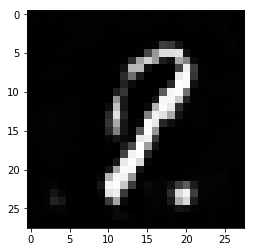

[2,   100] dis_loss: 0.468
[2,   100] gen_loss: 2.881
[2,   200] dis_loss: 0.417
[2,   200] gen_loss: 3.138
[2,   300] dis_loss: 0.436
[2,   300] gen_loss: 2.893
[2,   400] dis_loss: 0.371
[2,   400] gen_loss: 3.072
[2,   500] dis_loss: 0.442
[2,   500] gen_loss: 3.322
[2,   600] dis_loss: 0.409
[2,   600] gen_loss: 3.017
[2,   700] dis_loss: 0.391
[2,   700] gen_loss: 2.865
[2,   800] dis_loss: 0.466
[2,   800] gen_loss: 3.198
[2,   900] dis_loss: 0.429
[2,   900] gen_loss: 3.139
[2,  1000] dis_loss: 0.347
[2,  1000] gen_loss: 3.292
[2,  1100] dis_loss: 0.433
[2,  1100] gen_loss: 3.138
[2,  1200] dis_loss: 0.428
[2,  1200] gen_loss: 3.126
[2,  1300] dis_loss: 0.515
[2,  1300] gen_loss: 3.305
[2,  1400] dis_loss: 0.418
[2,  1400] gen_loss: 2.835
[2,  1500] dis_loss: 0.439
[2,  1500] gen_loss: 3.090
[2,  1600] dis_loss: 0.486
[2,  1600] gen_loss: 2.839
[2,  1700] dis_loss: 0.446
[2,  1700] gen_loss: 3.132
[2,  1800] dis_loss: 0.431
[2,  1800] gen_loss: 2.907
[2,  1900] dis_loss: 0.434
[

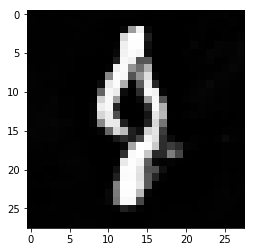

In [20]:
############ TRAINING ######################
for epoch in range(2):
    running_total_discriminator_loss  = 0.0
    running_generator_loss = 0.0
    for i,data in enumerate(train_loader,0):
        input_img,l = data
        input_img,l = input_img.cuda(),l.cuda()
        #zero the parameter gradients
        optimizer_discriminator.zero_grad()
        optimizer_generator.zero_grad()
        #forward + loss + backprop#
        
        ###Training discriminator###
    
        real_out = dis(input_img)
        real_loss = criterion(real_out,torch.ones(real_out.shape).cuda())
        Noise = noise(4).cuda()
        fake_image = gen(Noise)
        fake_out = dis(fake_image)
        fake_dis_loss = criterion(fake_out,torch.zeros(fake_out.shape).cuda())
        
        total_discriminator_loss = real_loss + fake_dis_loss
        total_discriminator_loss.backward()
        optimizer_discriminator.step()
       
        ###Training generator###
        Noise = noise(4).cuda()
        fake_image = gen(Noise)
        fake_out = dis(fake_image)
        generator_loss = criterion(fake_out,torch.ones(fake_out.shape).cuda())
        
        generator_loss.backward()
        optimizer_generator.step()
        
         # print statistics
        running_total_discriminator_loss += total_discriminator_loss.item()
        running_generator_loss += generator_loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] dis_loss: %.3f' %
                  (epoch + 1, i + 1, running_total_discriminator_loss / 100))
            print('[%d, %5d] gen_loss: %.3f' %
                  (epoch + 1, i + 1,running_generator_loss  / 100))
            generator_loss_buffer = np.append(generator_loss_buffer, running_generator_loss/100)
            discriminator_loss_buffer = np.append(discriminator_loss_buffer, running_total_discriminator_loss/100)
            running_total_discriminator_loss  = 0.0
            running_generator_loss = 0.0
            #save loss buffers
            np.save('./losses/generator_loss_buffer',generator_loss_buffer)
            np.save('./losses/discriminator_loss_buffer',discriminator_loss_buffer)
    model_path = './models'+str(epoch+6)+'.tar'
    torch.save({
        'gen_dict': gen.state_dict(),
        'dis_dict': dis.state_dict(),
        'optimizer_generator_dict':optimizer_generator.state_dict(),
        'optimizer_discriminator_dict':optimizer_discriminator.state_dict(),
        }, model_path)
    fake_image = gen(torch.randn(1,100).cuda())
    output = fake_image.cpu()
    imshow(torchvision.utils.make_grid(output))
    #plt.savefig(str(epoch)+".pdf")
    #fake_image = gen(torch.randn(1,100).cuda())    
    #cv2.imwrite(os.path.join('./trained_output', '%05d.png'), get_image(fake_image[0]))
    

In [12]:
################# Evaluation ####################

####### Loading Model #######
gen_eval = generator()
gen_eval = gen_eval.cuda()
dis_eval = discriminator()
dis_eval = dis_eval.cuda()
try:
    checkpoint = torch.load('./models7.tar')
    gen_eval.load_state_dict(checkpoint['gen_dict'])
    dis_eval.load_state_dict(checkpoint['dis_dict'])
    #optimizer_generator.load_state_dict(checkpoint['optimizer_generator_dict'])
    #optimizer_discriminator.load_state_dict(checkpoint['optimizer_discriminator_dict'])
except:
    print("no model found")
gen_eval.eval()
dis_eval.eval()

discriminator(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=1, bias=True)
  (output): Sigmoid()
)

In [29]:
########### Generating Image ###############
fake_image = gen_eval(torch.randn(64,100).cuda())

In [1]:
! pwd

E:\Gan_and_Cyclegan


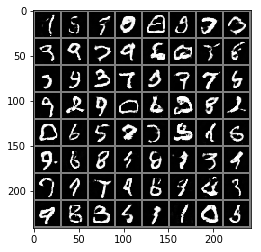

In [30]:
output = fake_image.cpu()
imshow(torchvision.utils.make_grid(output))
#plt.savefig(str(epoch)+".pdf")

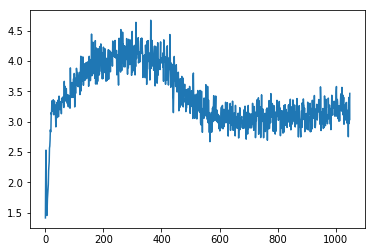

In [32]:
plt.plot(generator_loss_buffer)

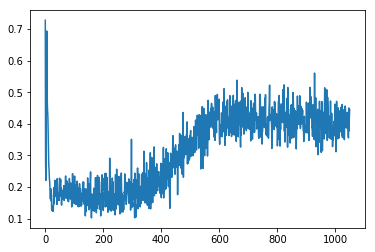

In [33]:
plt.plot(discriminator_loss_buffer)

In [7]:
c = generator_loss_buffer[20:]

Text(0.5,0,'Training')

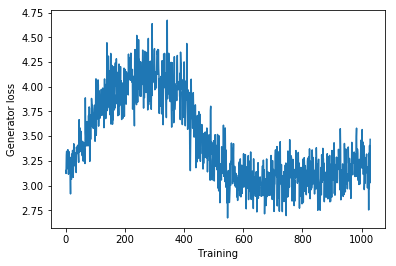

In [8]:
plt.plot(c)
plt.ylabel('Generator loss')
plt.xlabel('Training')